In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#parameters
Nini=5 #nombre de noeuds initiaux qui peuvent ou non être connectés. 
Nmax=1000
m=3 #j'ajoute un noeud à chaque itération qui va créer 3 liens avec les noeuds précédents

In [3]:
#initialization : premier graphe complètement connecté avec 5 noeuds
G=nx.complete_graph(Nini)

In [4]:
G.number_of_nodes()

5

In [5]:
G.number_of_edges()

10

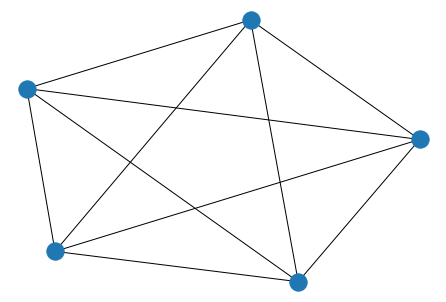

In [6]:
nx.draw(G)

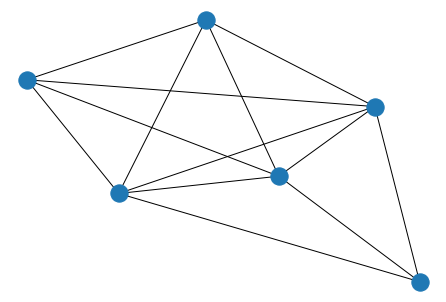

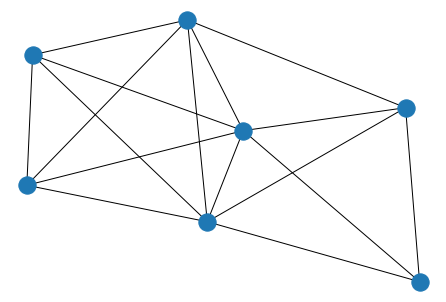

In [7]:
#node attachment loop:
for t in range(Nini+1,Nmax):
    listNodes=G.nodes()
    selNodes=random.sample(G.nodes(),m)
    selEdges=[(t,i) for i in selNodes]
    G.add_edges_from(selEdges)
    if(t<8):
        nx.draw(G)
        plt.show()

In [8]:
#degree distribution:
k=[G.degree(n) for n in G.nodes()]

Ci-dessous test Kim avant de passer à l'exponentielle.

In [15]:
def binning(degreeList,nbin):
    kmin=min(degreeList)
    kmax=max(degreeList)
    Bins = np.linspace(kmin, kmax,num=nbin)
    BinDensity, binedges = np.histogram(degreeList, bins=Bins, density=True)
    Bins = np.delete(Bins, -1)
    return BinDensity, Bins

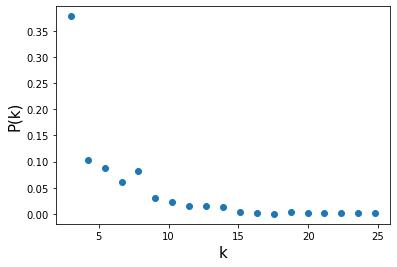

In [30]:
y,x=binning(np.array(k),20)
plt.scatter(x,y)
plt.xlabel('k',size=15)
plt.ylabel('P(k)',size=15)
plt.show()

In [22]:
def logBinning(degreeList,nbin):
    kmin=min(degreeList)
    kmax=max(degreeList)
    logBins = np.logspace(np.log10(kmin), np.log10(kmax),num=nbin)
    logBinDensity, binedges = np.histogram(degreeList, bins=logBins, density=True)
    logBins = np.delete(logBins, -1)
    return logBinDensity, logBins

Ce n'est pas une loi de puissance, c'est une loi exponentielle. 
Là je l'ai fait sur une seule expérience mais le mieux est de le faire sur plusieurs expériences. 

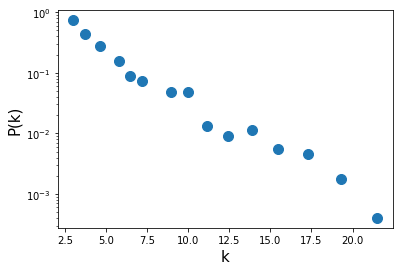

In [23]:
y,x=logBinning(np.array(k),20)
plt.semilogy(x,y,'o',markersize=10)
plt.xlabel('k',size=15)
plt.ylabel('P(k)',size=15)
plt.show()

# several replicas

In [24]:
#parameters
Nini=5
Nmax=1000
m=3
NREPL=50

Pour chaque replication, je fais un graphe initial et je fais tourner l'algorithme et j'ajoute le degré. 

In [25]:
k=[]
for r in range(NREPL):
    #initialization
    G=nx.complete_graph(Nini)
    #node attachment loop:
    for t in range(Nini+1,Nmax):
        listNodes=G.nodes()
        selNodes=random.sample(G.nodes(),m)
        selEdges=[(t,i) for i in selNodes]
        G.add_edges_from(selEdges)
    k=k+[G.degree(n) for n in G.nodes()]

On le voit encore mieux, on a une distribution exponentielle, ce n'est pas une loi de puissance (cf. slide 33). 

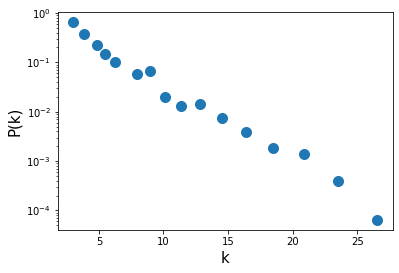

In [26]:
y,x=logBinning(np.array(k),20)
plt.semilogy(x,y,'o',markersize=10)
plt.xlabel('k',size=15)
plt.ylabel('P(k)',size=15)
plt.show()

# IT HAS AN EXPONENTIAL BEHAVIOR!!! IT IS NOT A POWER LAW